In [47]:
import tensorflow as tf
# Import MINST data
# careful with MNIST data as there are two versions: from tutorials where the shape is 
# [None, 784] amd from tensorflow.contrib.learn.python.learn.datasets.mnist
# where the shape is [None, 28*28]
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [49]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 25
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))

Epoch: 0001 cost= 0.727579354
Epoch: 0002 cost= 0.437954414
Epoch: 0003 cost= 0.390422756
Epoch: 0004 cost= 0.366539300
Epoch: 0005 cost= 0.351194134
Epoch: 0006 cost= 0.340470198
Epoch: 0007 cost= 0.332146455
Epoch: 0008 cost= 0.325583205
Epoch: 0009 cost= 0.320070180
Epoch: 0010 cost= 0.315537953
Epoch: 0011 cost= 0.311700014
Epoch: 0012 cost= 0.308338404
Epoch: 0013 cost= 0.305180651
Epoch: 0014 cost= 0.302654043
Epoch: 0015 cost= 0.300286745
Epoch: 0016 cost= 0.298087782
Epoch: 0017 cost= 0.296033256
Epoch: 0018 cost= 0.294242432
Epoch: 0019 cost= 0.292567293
Epoch: 0020 cost= 0.290929701
Epoch: 0021 cost= 0.289659972
Epoch: 0022 cost= 0.288213240
Epoch: 0023 cost= 0.287084227
Epoch: 0024 cost= 0.285738421
Epoch: 0025 cost= 0.284752253
Optimization Finished!
Accuracy: 0.900667


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
55000 10000 5000
(55000, 784) (55000, 10)
0.0 1.0
0.0 1.0
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.095799997, nan]
[0.097999997, nan]


'\n# We could do the same thing w/ Keras like so:\nfrom keras.models import Sequential\nmodel = Sequential()\nfrom keras.layers.core import Dense, Activation\nmodel.add(Dense(output_dim=10, input_dim=784, init=\'zero\'))\nmodel.add(Activation("softmax"))\nfrom keras.optimizers import SGD\nmodel.compile(loss=\'categorical_crossentropy\', \n    optimizer=SGD(lr=learning_rate))\nmodel.fit(mnist.train.images, mnist.train.labels, nb_epoch=n_epochs,\n          batch_size=batch_size, show_accuracy=True)\nobjective_score = model.evaluate(mnist.test.images, mnist.test.labels,\n                                 batch_size=100, show_accuracy=True)\n'

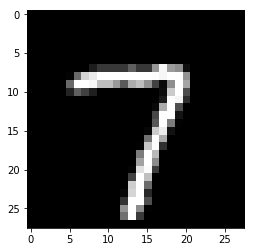

In [50]:
# version 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %%
# get the classic mnist dataset
# one-hot means a sparse vector for every observation where only
# the class label is 1, and every other class is 0.
# more info here:
# https://www.tensorflow.org/versions/0.6.0/tutorials/mnist/download/index.html#dataset-object
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

# %%
# mnist is now a DataSet with accessors for:
# 'train', 'test', and 'validation'.
# within each, we can access:
# images, labels, and num_examples
print(mnist.train.num_examples,
      mnist.test.num_examples,
      mnist.validation.num_examples)

# %% the images are stored as:
# n_observations x n_features tensor (n-dim array)
# the labels are stored as n_observations x n_labels,
# where each observation is a one-hot vector.
print(mnist.train.images.shape, mnist.train.labels.shape)

# %% the range of the values of the images is from 0-1
print(np.min(mnist.train.images), np.max(mnist.train.images))
print(np.min(mnist.train.labels), np.max(mnist.train.labels))


# %% we can visualize any one of the images by reshaping it to a 28x28 image
plt.imshow(np.reshape(mnist.train.images[100, :], (28, 28)), cmap='gray')

# %% We can create a container for an input image using tensorflow's graph:
# We allow the first dimension to be None, since this will eventually
# represent our mini-batches, or how many images we feed into a network
# at a time during training/validation/testing.
# The second dimension is the number of features that the image has.
n_input = 784
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])

# %% We can write a simple regression (y = W*x + b) as:
W = tf.Variable(tf.zeros([n_input, n_output]))
b = tf.Variable(tf.zeros([n_output]))
net_output = tf.nn.softmax(tf.matmul(net_input, W) + b)

# %% We'll create a placeholder for the true output of the network
y_true = tf.placeholder(tf.float32, [None, 10])

# %% And then write our loss function:
cross_entropy = -tf.reduce_sum(y_true * tf.log(net_output))

# %% This would equate each label in our one-hot vector between the
# prediction and actual using the argmax as the predicted label
correct_prediction = tf.equal(
    tf.argmax(net_output, 1), tf.argmax(y_true, 1))


# %% And now we can look at the mean of our network's correct guesses
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# %% We can tell the tensorflow graph to train w/ gradient descent using
# our loss function and an input learning rate
optimizer = tf.train.GradientDescentOptimizer(
    0.05).minimize(cross_entropy)

# %% We now create a new session to actually perform the initialization the
# variables:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# %% Now actually do some training:
batch_size = 25
n_epochs = 25
for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples // batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys
        })
    print(sess.run([accuracy, cross_entropy],
                   feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels
                   }))

# %% Print final test accuracy:
print(sess.run([accuracy,cross_entropy],
               feed_dict={
                   net_input: mnist.test.images,
                   y_true: mnist.test.labels
               }))

# %%
"""
# We could do the same thing w/ Keras like so:
from keras.models import Sequential
model = Sequential()
from keras.layers.core import Dense, Activation
model.add(Dense(output_dim=10, input_dim=784, init='zero'))
model.add(Activation("softmax"))
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', 
    optimizer=SGD(lr=learning_rate))
model.fit(mnist.train.images, mnist.train.labels, nb_epoch=n_epochs,
          batch_size=batch_size, show_accuracy=True)
objective_score = model.evaluate(mnist.test.images, mnist.test.labels,
                                 batch_size=100, show_accuracy=True)
"""

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
0.9201 2872.5


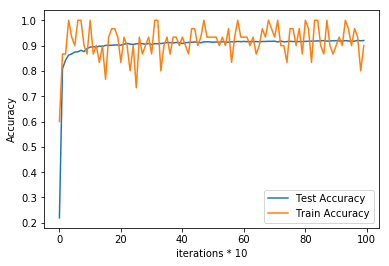

In [92]:
# version 3 - the quickets for me right now
import tensorflow as tf
#import tensorflow.examples.tutorials.mnist.input_data as input_data
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets


mnist = read_data_sets("data", one_hot=True, reshape=False, validation_size=0)
batch_size = 30

X = tf.placeholder(tf.float32, [None, 28,28,1])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))



# model
Y = tf.nn.softmax(tf.matmul(tf.reshape(X, [-1, 784]), W) + b)

# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 10])

# loss function
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

# % of correct answers found in batch
# it returns a vector of 1 and 0. 1 where index of values Y_ and Y are the same
is_correct = tf.equal(tf.argmax(Y_, 1), tf.argmax(Y, 1))
# takes sum of the values (converted to float32 from boolean and) 
# and divides it by # of values, thus having a % of correct values
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.0025)
# optimizer = tf.train.AdagradOptimizer(0.1)

train_step = optimizer.minimize(cross_entropy)

# Session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_X, batch_Y = mnist.train.next_batch(batch_size)

a_tr_list = []
c_tr_list = []
a_test_list = []
c_test_list = []
for i in range(5000):
    # load batch of images and corresponding answers for training data
    batch_X, batch_Y = mnist.train.next_batch(batch_size)
    train_data={X: batch_X, Y_: batch_Y}
    
    # train
    sess.run(train_step, feed_dict=train_data)
    
    # success?
    # compute accuracy and cross entropy every 10 interations
    if i % 50 == 0:
        a_tr, c_tr = sess.run([accuracy, cross_entropy], feed_dict=train_data)
        a_tr_list.append(a_tr)
        c_tr_list.append(c_tr)
    if i % 50 == 0:
        test_data={X: mnist.test.images, Y_: mnist.test.labels}
        a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
        a_test_list.append(a_test)
        c_test_list.append(c_test)
        
# print(a_tr_list, c_tr_list)
print(a_test, c_test)
plt.plot(a_test_list, label='Test Accuracy')
plt.plot(a_tr_list, label='Train Accuracy')
plt.legend()
plt.xlabel('iterations * 10')
plt.ylabel('Accuracy')

### Version with pytorch and MNIST

In [71]:
# fan on my PC kicks in loudly when running the pytorch version, but almost silent with tensorflow

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


# Hyper Parameters 
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 25
learning_rate = 0.01

# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='../data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='../data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)  

# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

# Save the Model
torch.save(model.state_dict(), 'model.pkl')

Files already downloaded
Epoch: [1/5], Step: [100/2400], Loss: 0.6995
Epoch: [1/5], Step: [200/2400], Loss: 0.7529
Epoch: [1/5], Step: [300/2400], Loss: 0.4886
Epoch: [1/5], Step: [400/2400], Loss: 0.3485
Epoch: [1/5], Step: [500/2400], Loss: 0.2840
Epoch: [1/5], Step: [600/2400], Loss: 0.4227
Epoch: [1/5], Step: [700/2400], Loss: 0.3996
Epoch: [1/5], Step: [800/2400], Loss: 0.5014
Epoch: [1/5], Step: [900/2400], Loss: 0.4708
Epoch: [1/5], Step: [1000/2400], Loss: 0.4939
Epoch: [1/5], Step: [1100/2400], Loss: 0.4725
Epoch: [1/5], Step: [1200/2400], Loss: 0.5772
Epoch: [1/5], Step: [1300/2400], Loss: 0.6008
Epoch: [1/5], Step: [1400/2400], Loss: 0.4355
Epoch: [1/5], Step: [1500/2400], Loss: 0.4335
Epoch: [1/5], Step: [1600/2400], Loss: 0.1530
Epoch: [1/5], Step: [1700/2400], Loss: 0.6974
Epoch: [1/5], Step: [1800/2400], Loss: 0.3894
Epoch: [1/5], Step: [1900/2400], Loss: 0.2258
Epoch: [1/5], Step: [2000/2400], Loss: 0.5091
Epoch: [1/5], Step: [2100/2400], Loss: 0.2651
Epoch: [1/5], Step

### Logistic Regression on ISLR smarket data with tensorflow

,Lag1,Lag2,Lag3,Lag4,Lag5,Direction,Down,Up
0,0.381,-0.192,-2.624,-1.055,5.010,Up,0,1
1,0.959,0.381,-0.192,-2.624,-1.055,Up,0,1
2,1.032,0.959,0.381,-0.192,-2.624,Down,1,0
3,-0.623,1.032,0.959,0.381,-0.192,Up,0,1
4,0.614,-0.623,1.032,0.959,0.381,Up,0,1


0.588 170.179


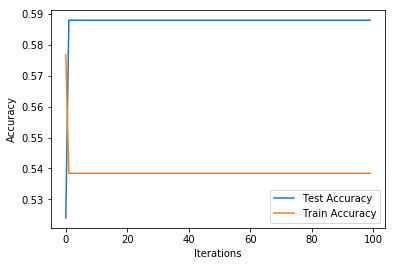

In [39]:
import pandas as pd
import numpy as np
smarket = pd.read_csv('/home/yol/Documents/Dev/tensorflow/TensorFlow-Examples/notebooks/data/Smarket.csv', usecols=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 
       'Direction'])

down_up = pd.get_dummies(smarket.Direction)
smarket['Down'] = down_up.ix[:,0]
smarket['Up'] = down_up.ix[:,1]
smarket.head()


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import tensorflow.examples.tutorials.mnist.input_data as input_data

tr_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[:1000]
tr_labels = smarket[['Down', 'Up']].values[:1000]
tst_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[1000:]
tst_labels = smarket[['Down', 'Up']].values[1000:]
epochs = 100
batches = 100
batch_size = 25

X = tf.placeholder(tf.float32, [None, 5])
W = tf.Variable(tf.zeros([5, 2]))
b = tf.Variable(tf.zeros([2]))



# model
Y = tf.nn.softmax(tf.matmul(tf.reshape(X, [-1, 5]), W) + b)

# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 2])

# loss function
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

# % of correct answers found in batch
# it returns a vector of 1 and 0. 1 where index of values Y_ and Y are the same
is_correct = tf.equal(tf.argmax(Y_, 1), tf.argmax(Y, 1))
# takes sum of the values (converted to float32 from boolean and) 
# and divides it by # of values, thus having a % of correct values
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step = optimizer.minimize(cross_entropy)

# Session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

a_tr_list = []
c_tr_list = []
a_test_list = []
c_test_list = []
for i in range(epochs):
    for batch in range(batches):    
        
        # load batch of images and corresponding answers for training data
        batch_X, batch_Y = tr_data[batch*batch_size:batch*batch_size+batch_size+1],\
        tr_labels[batch*batch_size:batch*batch_size+batch_size+1]
        train_data={X: batch_X, Y_: batch_Y}

        # train
        sess.run(train_step, feed_dict=train_data)

        # success?
        # compute accuracy and cross entropy every 10 interations
        if batch % 100 == 0:
            a_tr, c_tr = sess.run([accuracy, cross_entropy], feed_dict=train_data)
            a_tr_list.append(a_tr)
            c_tr_list.append(c_tr)
        if batch % 100 == 0:
            test_data={X: tst_data, Y_: tst_labels}
            a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
            a_test_list.append(a_test)
            c_test_list.append(c_test)
print(a_test, c_test)
        
#print(a_tr_list, c_tr_list)

plt.plot(a_test_list, label='Test Accuracy')
plt.plot(a_tr_list,  label='Train Accuracy')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

### Logistic Regression on ISLR smarket data with pytorch

In [37]:
# fan on my PC kicks in loudly when running the pytorch version, but almost silent with tensorflow
not working yet

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

train_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[:1000]
train_labels = smarket[['Down', 'Up']].values[:1000]
test_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[1000:]
test_labels = smarket[['Down', 'Up']].values[1000:]
# Hyper Parameters 
input_size = 5
num_classes = 2
num_epochs = 5
batch_size = 25
learning_rate = 0.01

# MNIST Dataset (Images and Labels)
train_dataset_data = torch.from_numpy(train_data)
train_dataset_labels = torch.from_numpy(train_labels)
test_dataset_data = torch.from_numpy(test_data)
test_dataset_labels = torch.from_numpy(test_labels)


# Dataset Loader (Input Pipline)
train_data_loader = torch.utils.data.DataLoader(dataset=train_dataset_data, 
                                           batch_size=batch_size, 
                                           shuffle=True)

train_labels_loader = torch.utils.data.DataLoader(dataset=train_dataset_labels, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test__data_loader = torch.utils.data.DataLoader(dataset=test_dataset_data, 
                                          batch_size=batch_size, 
                                          shuffle=False)

test_labels_loader = torch.utils.data.DataLoader(dataset=test_dataset_labels, 
                                           batch_size=batch_size, 
                                           shuffle=True)

# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)  

# Training the Model
for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_loader):
    train_vars = Variable(train_data_loader.dataset)
    train_labels = Variable(train_labels_loader.dataset)


    # Forward + Backward + Optimize
    optimizer.zero_grad()
    outputs = model(train_vars)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
        print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
               % (epoch+1, num_epochs, i+1, len(train_dataset_data)//batch_size, loss.data[0]))

# # Test the Model
# correct = 0
# total = 0
# for images, labels in test_loader:
#     images = Variable(images.view(-1, 28*28))
#     outputs = model(images)
#     _, predicted = torch.max(outputs.data, 1)
#     total += labels.size(0)
#     correct += (predicted == labels).sum()
    
# print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

# # Save the Model
# torch.save(model.state_dict(), 'model.pkl')

TypeError: addmm_ received an invalid combination of arguments - got (int, int, torch.DoubleTensor, torch.FloatTensor), but expected one of:
 * (torch.DoubleTensor mat1, torch.DoubleTensor mat2)
 * (torch.SparseDoubleTensor mat1, torch.DoubleTensor mat2)
 * (float beta, torch.DoubleTensor mat1, torch.DoubleTensor mat2)
 * (float alpha, torch.DoubleTensor mat1, torch.DoubleTensor mat2)
 * (float beta, torch.SparseDoubleTensor mat1, torch.DoubleTensor mat2)
 * (float alpha, torch.SparseDoubleTensor mat1, torch.DoubleTensor mat2)
 * (float beta, float alpha, torch.DoubleTensor mat1, torch.DoubleTensor mat2)
 * (float beta, float alpha, torch.SparseDoubleTensor mat1, torch.DoubleTensor mat2)


### 2 layers softmax and sigmoids - tensorflow

In [106]:
import tensorflow as tf
# import tensorflowvisu
# from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
tf.set_random_seed(0)

# neural network with 5 layers
#
# · · · · · · · · · ·          (input data, flattened pixels)       X [batch, 784]   # 784 = 28*28
# \x/x\x/x\x/x\x/x\x/       -- fully connected layer (sigmoid)      W1 [784, 200]      B1[200]
#  · · · · · · · · ·                                                Y1 [batch, 200]
#   \x/x\x/x\x/x\x/         -- fully connected layer (sigmoid)      W2 [200, 100]      B2[100]
#    · · · · · · ·                                                  Y2 [batch, 100]
#     \x/x\x/x\x/           -- fully connected layer (sigmoid)      W3 [100, 60]       B3[60]
#      · · · · ·                                                    Y3 [batch, 60]
#       \x/x\x/             -- fully connected layer (sigmoid)      W4 [60, 30]        B4[30]
#        · · ·                                                      Y4 [batch, 30]
#         \x/               -- fully connected layer (softmax)      W5 [30, 10]        B5[10]
#          ·                                                        Y5 [batch, 10]

# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])

# five layers and their number of neurons (tha last layer has 10 softmax neurons)
L = 200
M = 100
N = 60
O = 30
# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1))  # 784 = 28 * 28
B1 = tf.Variable(tf.zeros([L]))
W2 = tf.Variable(tf.truncated_normal([L, 10], stddev=0.1))
B2 = tf.Variable(tf.zeros([10]))
# W3 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
# B3 = tf.Variable(tf.zeros([N]))
# W4 = tf.Variable(tf.truncated_normal([N, O], stddev=0.1))
# B4 = tf.Variable(tf.zeros([O]))
# W5 = tf.Variable(tf.truncated_normal([O, 10], stddev=0.1))
# B5 = tf.Variable(tf.zeros([10]))

# The model
XX = tf.reshape(X, [-1, 784])
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)
# Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)
# Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3)
# Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + B4)
# Ylogits = tf.matmul(Y4, W5) + B5
Ylogits = tf.matmul(Y1, W2) + B2
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# matplotlib visualisation
# allweights = tf.concat([tf.reshape(W1, [-1]), tf.reshape(W2, [-1]), tf.reshape(W3, [-1]), tf.reshape(W4, [-1]), tf.reshape(W5, [-1])], 0)
# allbiases  = tf.concat([tf.reshape(B1, [-1]), tf.reshape(B2, [-1]), tf.reshape(B3, [-1]), tf.reshape(B4, [-1]), tf.reshape(B5, [-1])], 0)
# I = tensorflowvisu.tf_format_mnist_images(X, Y, Y_)
# It = tensorflowvisu.tf_format_mnist_images(X, Y, Y_, 1000, lines=25)
# datavis = tensorflowvisu.MnistDataVis()
accur = []

# training step, learning rate = 0.003
learning_rate = 0.003
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# You can call this function in a loop to train the model, 100 images at a time
def training_step(i, update_train_data, update_test_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values for visualisation
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], {X: batch_X, Y_: batch_Y})
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c) + " (lr:" + str(learning_rate) + ")")
#         datavis.append_training_curves_data(i, a, c)
#         datavis.update_image1(im)
#         datavis.append_data_histograms(i, w, b)

    # compute test values for visualisation
    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], {X: mnist.test.images, Y_: mnist.test.labels})
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))
#         datavis.append_test_curves_data(i, a, c)
#         datavis.update_image2(im)
        accur.append(a)

    # the backpropagation training step
    sess.run(train_step, {X: batch_X, Y_: batch_Y})

# datavis.animate(training_step, iterations=10000+1, train_data_update_freq=20, test_data_update_freq=100, more_tests_at_start=True)

# to save the animation as a movie, add save_movie=True as an argument to datavis.animate
# to disable the visualisation use the following line instead of the datavis.animate line
for i in range(10000+1): training_step(i, i % 100 == 0, i % 20 == 0)

# print("max test accuracy: " + str(datavis.get_max_test_accuracy()))
print("max test accuracy: " + str(sorted(accur)[-1]))

# Some results to expect:
# (In all runs, if sigmoids are used, all biases are initialised at 0, if RELUs are used,
# all biases are initialised at 0.1 apart from the last one which is initialised at 0.)

## learning rate = 0.003, 10K iterations
# final test accuracy = 0.9788 (sigmoid - slow start, training cross-entropy not stabilised in the end)
# final test accuracy = 0.9825 (relu - above 0.97 in the first 1500 iterations but noisy curves)

## now with learning rate = 0.0001, 10K iterations
# final test accuracy = 0.9722 (relu - slow but smooth curve, would have gone higher in 20K iterations)

## decaying learning rate from 0.003 to 0.0001 decay_speed 2000, 10K iterations
# final test accuracy = 0.9746 (sigmoid - training cross-entropy not stabilised)
# final test accuracy = 0.9824 (relu - training set fully learned, test accuracy stable)


Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
0: accuracy:0.08 loss: 251.051 (lr:0.01)
0: ********* epoch 1 ********* test accuracy:0.0977 test loss: 247.664
20: ********* epoch 1 ********* test accuracy:0.8063 test loss: 61.0864
40: ********* epoch 1 ********* test accuracy:0.8755 test loss: 42.4769
60: ********* epoch 1 ********* test accuracy:0.8781 test loss: 38.9008
80: ********* epoch 1 ********* test accuracy:0.8983 test loss: 33.0194
100: accuracy:0.9 loss: 31.7669 (lr:0.01)
100: ********* epoch 1 ********* test accuracy:0.8963 test loss: 34.4186
120: ********* epoch 1 ********* test accuracy:0.8942 test loss: 35.5954
140: ********* epoch 1 ********* test accuracy:0.9119 test loss: 29.2965
160: ********* epoch 1 ********* test accuracy:0.9182 test loss: 27.3779
180: ********* epoch 1 ********* test accuracy:0.9295 test loss: 23.1476
200: accuracy:0.92 loss

### 2 layers softmax and Relu - tensorflow

In [109]:
import tensorflow as tf
# import tensorflowvisu
# from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
tf.set_random_seed(0)

# neural network with 5 layers
#
# · · · · · · · · · ·          (input data, flattened pixels)       X [batch, 784]   # 784 = 28*28
# \x/x\x/x\x/x\x/x\x/       -- fully connected layer (sigmoid)      W1 [784, 200]      B1[200]
#  · · · · · · · · ·                                                Y1 [batch, 200]
#   \x/x\x/x\x/x\x/         -- fully connected layer (sigmoid)      W2 [200, 100]      B2[100]
#    · · · · · · ·                                                  Y2 [batch, 100]
#     \x/x\x/x\x/           -- fully connected layer (sigmoid)      W3 [100, 60]       B3[60]
#      · · · · ·                                                    Y3 [batch, 60]
#       \x/x\x/             -- fully connected layer (sigmoid)      W4 [60, 30]        B4[30]
#        · · ·                                                      Y4 [batch, 30]
#         \x/               -- fully connected layer (softmax)      W5 [30, 10]        B5[10]
#          ·                                                        Y5 [batch, 10]

# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])

# five layers and their number of neurons (tha last layer has 10 softmax neurons)
L = 200
M = 100
N = 60
O = 30
# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1))  # 784 = 28 * 28
B1 = tf.Variable(tf.ones([L])/10)
W2 = tf.Variable(tf.truncated_normal([L, 10], stddev=0.1))
B2 = tf.Variable(tf.zeros([10]))

# The model
XX = tf.reshape(X, [-1, 784])
Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)

Ylogits = tf.matmul(Y1, W2) + B2
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

accur = []

# training step, learning rate = 0.003
learning_rate = 0.003
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# You can call this function in a loop to train the model, 100 images at a time
def training_step(i, update_train_data, update_test_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values for visualisation
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], {X: batch_X, Y_: batch_Y})
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c) + " (lr:" + str(learning_rate) + ")")

    # compute test values for visualisation
    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], {X: mnist.test.images, Y_: mnist.test.labels})
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))
        accur.append(a)

    # the backpropagation training step
    sess.run(train_step, {X: batch_X, Y_: batch_Y})

for i in range(10000+1): training_step(i, i % 100 == 0, i % 20 == 0)

# print("max test accuracy: " + str(datavis.get_max_test_accuracy()))
print("max test accuracy: " + str(sorted(accur)[-1]))

# (In all runs, if sigmoids are used, all biases are initialised at 0, if RELUs are used,
# all biases are initialised at 0.1 apart from the last one which is initialised at 0.)
# final test accuracy = 0.9824 (relu - training set fully learned, test accuracy stable)


Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
0: accuracy:0.12 loss: 275.176 (lr:0.003)
0: ********* epoch 1 ********* test accuracy:0.1061 test loss: 277.84
20: ********* epoch 1 ********* test accuracy:0.8406 test loss: 51.0423
40: ********* epoch 1 ********* test accuracy:0.885 test loss: 39.094
60: ********* epoch 1 ********* test accuracy:0.8982 test loss: 33.5927
80: ********* epoch 1 ********* test accuracy:0.9065 test loss: 30.4026
100: accuracy:0.94 loss: 31.9083 (lr:0.003)
100: ********* epoch 1 ********* test accuracy:0.9075 test loss: 30.6766
120: ********* epoch 1 ********* test accuracy:0.9033 test loss: 31.6303
140: ********* epoch 1 ********* test accuracy:0.9245 test loss: 25.754
160: ********* epoch 1 ********* test accuracy:0.9335 test loss: 22.7708
180: ********* epoch 1 ********* test accuracy:0.9371 test loss: 21.279
200: accuracy:0.91 loss: 

### 2 layer nn with Relu and softmax for ISLR smarket data

In [156]:
import tensorflow as tf
tf.set_random_seed(0)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

smarket = pd.read_csv('/home/yol/Documents/Dev/tensorflow/TensorFlow-Examples/notebooks/data/Smarket.csv', usecols=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 
       'Direction'])
down_up = pd.get_dummies(smarket.Direction)
smarket['Down'] = down_up.ix[:,0]
smarket['Up'] = down_up.ix[:,1]
smarket.shape[0]

1250

***** Epoch: 0 ****** Batch: 39 **** cost test 17.2583
***** Epoch: 1 ****** Batch: 39 **** cost test 17.3941
***** Epoch: 2 ****** Batch: 39 **** cost test 17.3865
***** Epoch: 3 ****** Batch: 39 **** cost test 17.3811
***** Epoch: 4 ****** Batch: 39 **** cost test 17.3774
***** Epoch: 5 ****** Batch: 39 **** cost test 17.3753
***** Epoch: 6 ****** Batch: 39 **** cost test 17.3729
***** Epoch: 7 ****** Batch: 39 **** cost test 17.3735
***** Epoch: 8 ****** Batch: 39 **** cost test 17.3694
***** Epoch: 9 ****** Batch: 39 **** cost test 17.3675
***** Epoch: 10 ****** Batch: 39 **** cost test 17.3639
***** Epoch: 11 ****** Batch: 39 **** cost test 17.3616
***** Epoch: 12 ****** Batch: 39 **** cost test 17.3597
***** Epoch: 13 ****** Batch: 39 **** cost test 17.3622
***** Epoch: 14 ****** Batch: 39 **** cost test 17.3644
***** Epoch: 15 ****** Batch: 39 **** cost test 17.366
***** Epoch: 16 ****** Batch: 39 **** cost test 17.3677
***** Epoch: 17 ****** Batch: 39 **** cost test 17.3695
***

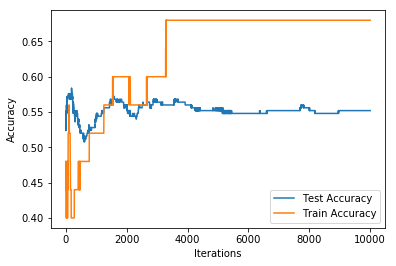

In [239]:
# version with 2 layer and learning rate decay in place

import tensorflow as tf
tf.set_random_seed(0)
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

smarket = pd.read_csv('/home/yol/Documents/Dev/tensorflow/TensorFlow-Examples/notebooks/data/Smarket.csv', usecols=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 
       'Direction'])
down_up = pd.get_dummies(smarket.Direction)
smarket['Down'] = down_up.ix[:,0]
smarket['Up'] = down_up.ix[:,1]
smarket.head()

tr_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[:1000]
tr_labels = smarket[['Down', 'Up']].values[:1000]
tst_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[1000:]
tst_labels = smarket[['Down', 'Up']].values[1000:]
epochs = 10000  # epochs 10000, LR = 0.001, batch_size = 25, one hidden layer of 10 nodes(L)  => 0.64 accuracy
batch_size = 25

lr = tf.placeholder(tf.float32)
max_learning_rate = 0.001
min_learning_rate = 0.0001
decay_speed = 2000.0 # 0.003-0.0001-2000=>0.9826 done in 5000 iterations


# five layers and their number of neurons (tha last layer has 10 softmax neurons)
L = 20

# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
X = tf.placeholder(tf.float32, [None, 5])
# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 2])
W1 = tf.Variable(tf.truncated_normal([5, L], stddev=0.1)) 
B1 = tf.Variable(tf.ones([L])/10)
W2 = tf.Variable(tf.truncated_normal([L, 2], stddev=0.1))
B2 = tf.Variable(tf.ones([2])/10)

# The model
Y1 = tf.nn.relu(tf.matmul(tf.reshape(X, [-1, 5]), W1) + B1)

Ylogits = tf.matmul(Y1, W2) + B2
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*batch_size

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training step, learning rate = 0.003
# learning_rate = 0.003
# here the learning rate decay is implemented
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# You can call this function in a loop to train the model, 100 images at a time
a_tr_list = []
c_tr_list = []
a_test_list = []
c_test_list = []
for i in range(epochs):
    for batch in range(tr_data.shape[0]//batch_size):   

        learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)
        
        # load batch of images and corresponding answers for training data
        batch_X, batch_Y = tr_data[batch*batch_size:batch*batch_size+batch_size+1],\
        tr_labels[batch*batch_size:batch*batch_size+batch_size+1]
        train_data={X: batch_X, Y_: batch_Y}

        # train
        sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, lr : learning_rate})
    print("***** Epoch: %i ****** Batch: %i **** cost test %s" % (i,batch, c_tr))

        # success?
        # compute accuracy and cross entropy every 10 interations

    a_tr, c_tr = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    a_tr_list.append(a_tr)
    c_tr_list.append(c_tr)

    test_data={X: tst_data, Y_: tst_labels}
    a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    a_test_list.append(a_test)
    c_test_list.append(c_test)
print(max(a_test_list))
        
#print(a_tr_list, c_tr_list)

plt.plot(a_test_list, label='Test Accuracy')
plt.plot(a_tr_list,  label='Train Accuracy')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
# (In all runs, if sigmoids are used, all biases are initialised at 0, if RELUs are used,
# all biases are initialised at 0.1 apart from the last one which is initialised at 0.)
# final test accuracy = 0.9824 (relu - training set fully learned, test accuracy stable)


***** Epoch: 0 ****** Batch: 39 **** cost test 16.6439
***** Epoch: 1 ****** Batch: 39 **** cost test 17.2654
***** Epoch: 2 ****** Batch: 39 **** cost test 17.2677
***** Epoch: 3 ****** Batch: 39 **** cost test 17.2731
***** Epoch: 4 ****** Batch: 39 **** cost test 17.2785
***** Epoch: 5 ****** Batch: 39 **** cost test 17.2848
***** Epoch: 6 ****** Batch: 39 **** cost test 17.2918
***** Epoch: 7 ****** Batch: 39 **** cost test 17.2995
***** Epoch: 8 ****** Batch: 39 **** cost test 17.3077
***** Epoch: 9 ****** Batch: 39 **** cost test 17.3155
***** Epoch: 10 ****** Batch: 39 **** cost test 17.3233
***** Epoch: 11 ****** Batch: 39 **** cost test 17.3303
***** Epoch: 12 ****** Batch: 39 **** cost test 17.3379
***** Epoch: 13 ****** Batch: 39 **** cost test 17.3471
***** Epoch: 14 ****** Batch: 39 **** cost test 17.357
***** Epoch: 15 ****** Batch: 39 **** cost test 17.3641
***** Epoch: 16 ****** Batch: 39 **** cost test 17.371
***** Epoch: 17 ****** Batch: 39 **** cost test 17.376
*****

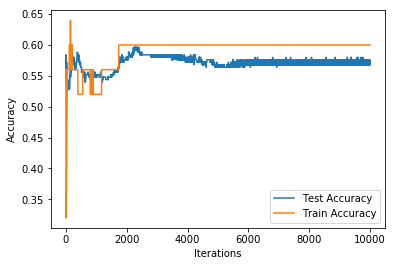

In [241]:
# version with 2 layers, learning rate and no lr decay 

import tensorflow as tf
tf.set_random_seed(0)
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

smarket = pd.read_csv('/home/yol/Documents/Dev/tensorflow/TensorFlow-Examples/notebooks/data/Smarket.csv', usecols=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 
       'Direction'])
down_up = pd.get_dummies(smarket.Direction)
smarket['Down'] = down_up.ix[:,0]
smarket['Up'] = down_up.ix[:,1]
smarket.head()

tr_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[:1000]
tr_labels = smarket[['Down', 'Up']].values[:1000]
tst_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[1000:]
tst_labels = smarket[['Down', 'Up']].values[1000:]
epochs = 10000  # epochs 10000, LR = 0.001, batch_size = 25, one hidden layer of 10 nodes(L)  => 0.64 accuracy
batch_size = 25



# one layer with 10 relu nodes and then 2 softmax nodes
L = 10

# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
X = tf.placeholder(tf.float32, [None, 5])
# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 2])
W1 = tf.Variable(tf.truncated_normal([5, L], stddev=0.1)) 
B1 = tf.Variable(tf.ones([L])/10)
W2 = tf.Variable(tf.truncated_normal([L, 2], stddev=0.1))
B2 = tf.Variable(tf.ones([2])/10)

# The model
Y1 = tf.nn.relu(tf.matmul(tf.reshape(X, [-1, 5]), W1) + B1)

Ylogits = tf.matmul(Y1, W2) + B2
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*batch_size

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

lr = 0.001
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

a_tr_list = []
c_tr_list = []
a_test_list = []
c_test_list = []
for i in range(epochs):
    for batch in range(tr_data.shape[0]//batch_size):   
        
        # load batch of images and corresponding answers for training data
        batch_X, batch_Y = tr_data[batch*batch_size:batch*batch_size+batch_size+1],\
        tr_labels[batch*batch_size:batch*batch_size+batch_size+1]
        train_data={X: batch_X, Y_: batch_Y}

        # train
        sess.run(train_step, feed_dict=train_data)
    print("***** Epoch: %i ****** Batch: %i **** cost test %s" % (i,batch, c_tr))
    a_tr, c_tr = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    a_tr_list.append(a_tr)
    c_tr_list.append(c_tr)

    test_data={X: tst_data, Y_: tst_labels}
    a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    a_test_list.append(a_test)
    c_test_list.append(c_test)
print(max(a_test_list))


plt.plot(a_test_list, label='Test Accuracy')
plt.plot(a_tr_list,  label='Train Accuracy')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

### 5 layers for MNIST image classification with relu and AdamOptimizer and LR decay

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
0: accuracy:0.12 loss: 245.228 (lr:0.003)
0: ********* epoch 1 ********* test accuracy:0.097 test loss: 248.049
20: accuracy:0.82 loss: 63.3752 (lr:0.0029711445178725875)
40: accuracy:0.92 loss: 43.4494 (lr:0.0029425761525895904)
60: accuracy:0.96 loss: 19.9996 (lr:0.0029142920472906737)
80: accuracy:0.92 loss: 28.7775 (lr:0.0028862893735417373)
100: accuracy:0.93 loss: 26.1836 (lr:0.0028585653310520707)
100: ********* epoch 1 ********* test accuracy:0.8943 test loss: 33.0609
120: accuracy:0.91 loss: 25.3655 (lr:0.0028311171473943213)
140: accuracy:0.92 loss: 26.4953 (lr:0.0028039420777272502)
160: accuracy:0.89 loss: 27.3328 (lr:0.0027770374045212438)
180: accuracy:0.94 loss: 19.2306 (lr:0.0027504004372865616)
200: accuracy:0.91 loss: 27.0664 (lr:0.0027240285123042826)
200: ********* epoch 1 ********* test accuracy:0.

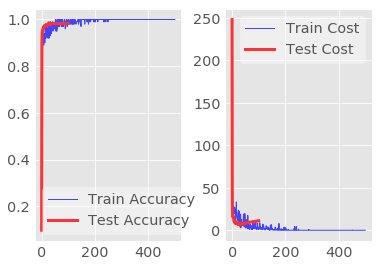

In [342]:
# encoding: UTF-8
# Copyright 2016 Google.com
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import tensorflow as tf
import tensorflowvisu
import math
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
tf.set_random_seed(0)

# neural network with 5 layers
#
# · · · · · · · · · ·          (input data, flattened pixels)       X [batch, 784]   # 784 = 28*28
# \x/x\x/x\x/x\x/x\x/       -- fully connected layer (relu)         W1 [784, 200]      B1[200]
#  · · · · · · · · ·                                                Y1 [batch, 200]
#   \x/x\x/x\x/x\x/         -- fully connected layer (relu)         W2 [200, 100]      B2[100]
#    · · · · · · ·                                                  Y2 [batch, 100]
#     \x/x\x/x\x/           -- fully connected layer (relu)         W3 [100, 60]       B3[60]
#      · · · · ·                                                    Y3 [batch, 60]
#       \x/x\x/             -- fully connected layer (relu)         W4 [60, 30]        B4[30]
#        · · ·                                                      Y4 [batch, 30]
#         \x/               -- fully connected layer (softmax)      W5 [30, 10]        B5[10]
#          ·                                                        Y5 [batch, 10]

# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])
# variable learning rate
lr = tf.placeholder(tf.float32)

# five layers and their number of neurons (tha last layer has 10 softmax neurons)
L = 200
M = 100
N = 60
O = 30
# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1))  # 784 = 28 * 28
B1 = tf.Variable(tf.ones([L])/10)
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.ones([M])/10)
W3 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B3 = tf.Variable(tf.ones([N])/10)
W4 = tf.Variable(tf.truncated_normal([N, O], stddev=0.1))
B4 = tf.Variable(tf.ones([O])/10)
W5 = tf.Variable(tf.truncated_normal([O, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

# The model
XX = tf.reshape(X, [-1, 784])
Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# matplotlib visualisation
allweights = tf.concat([tf.reshape(W1, [-1]), tf.reshape(W2, [-1]), tf.reshape(W3, [-1]), tf.reshape(W4, [-1]), tf.reshape(W5, [-1])], 0)
allbiases  = tf.concat([tf.reshape(B1, [-1]), tf.reshape(B2, [-1]), tf.reshape(B3, [-1]), tf.reshape(B4, [-1]), tf.reshape(B5, [-1])], 0)

# training step, the learning rate is a placeholder
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
test_acc_list, test_cost_list, train_acc_list, train_cost_list = [],[],[],[]


# You can call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # learning rate decay
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0 # 0.003-0.0001-2000=>0.9826 done in 5000 iterations
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)

    # compute training values for visualisation
    if update_train_data:
        a, c, w, b = sess.run([accuracy, cross_entropy, allweights, allbiases], {X: batch_X, Y_: batch_Y})
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c) + " (lr:" + str(learning_rate) + ")")
        train_acc_list.append(a)
        train_cost_list.append(c)

    # compute test values for visualisation
    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], {X: mnist.test.images, Y_: mnist.test.labels})
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))
        test_acc_list.append(a)
        test_cost_list.append(c)

    # the backpropagation training step
    sess.run(train_step, {X: batch_X, Y_: batch_Y, lr: learning_rate})

# datavis.animate(training_step, iterations=10000+1, train_data_update_freq=20, test_data_update_freq=100, more_tests_at_start=True)

# to save the animation as a movie, add save_movie=True as an argument to datavis.animate
# to disable the visualisation use the following line instead of the datavis.animate line
for i in range(10000+1): training_step(i, i % 100 == 0, i % 20 == 0)

print("max test accuracy: %s"% max(test_acc_list))

# plotting Accuacy and Cost

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.plot(train_acc_list, label='Train Accuracy')
ax1.plot(test_acc_list, label='Test Accuracy')
ax1.legend()
# ax1.xlabel('Iterations')
# ax1.ylabel('Accuracy')

ax2.plot(train_cost_list, label='Train Cost')
ax2.plot(test_cost_list, label='Test Cost')
ax2.legend()

# Some results to expect:
# (In all runs, if sigmoids are used, all biases are initialised at 0, if RELUs are used,
# all biases are initialised at 0.1 apart from the last one which is initialised at 0.)

## learning rate = 0.003, 10K iterations
# final test accuracy = 0.9788 (sigmoid - slow start, training cross-entropy not stabilised in the end)
# final test accuracy = 0.9825 (relu - above 0.97 in the first 1500 iterations but noisy curves)

## now with learning rate = 0.0001, 10K iterations
# final test accuracy = 0.9722 (relu - slow but smooth curve, would have gone higher in 20K iterations)

## decaying learning rate from 0.003 to 0.0001 decay_speed 2000, 10K iterations
# final test accuracy = 0.9746 (sigmoid - training cross-entropy not stabilised)
# final test accuracy = 0.9824 (relu - training set fully learned, test accuracy stable)



### 5 layers nn with Relu and softmax for ISLR smarket data

***** Epoch: 0 ****** Batch: 9 **** cost test 80.7379
***** Epoch: 1 ****** Batch: 9 **** cost test 68.7077
***** Epoch: 2 ****** Batch: 9 **** cost test 68.7706
***** Epoch: 3 ****** Batch: 9 **** cost test 68.7967
***** Epoch: 4 ****** Batch: 9 **** cost test 68.81
***** Epoch: 5 ****** Batch: 9 **** cost test 68.8135
***** Epoch: 6 ****** Batch: 9 **** cost test 68.814
***** Epoch: 7 ****** Batch: 9 **** cost test 68.8114
***** Epoch: 8 ****** Batch: 9 **** cost test 68.8083
***** Epoch: 9 ****** Batch: 9 **** cost test 68.8024
***** Epoch: 10 ****** Batch: 9 **** cost test 68.7941
***** Epoch: 11 ****** Batch: 9 **** cost test 68.7859
***** Epoch: 12 ****** Batch: 9 **** cost test 68.7743
***** Epoch: 13 ****** Batch: 9 **** cost test 68.762
***** Epoch: 14 ****** Batch: 9 **** cost test 68.7487
***** Epoch: 15 ****** Batch: 9 **** cost test 68.7339
***** Epoch: 16 ****** Batch: 9 **** cost test 68.7182
***** Epoch: 17 ****** Batch: 9 **** cost test 68.7019
***** Epoch: 18 ****** B

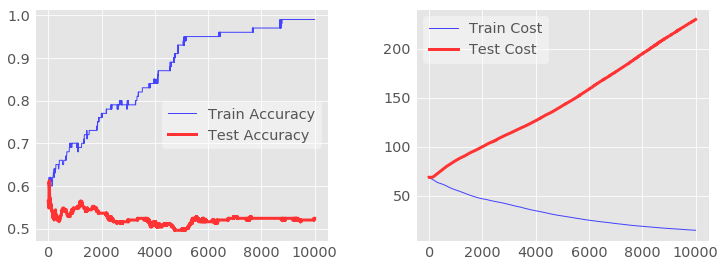

In [341]:
# version with 2 layers, learning rate and no lr decay 

import tensorflow as tf
tf.set_random_seed(0)
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

smarket = pd.read_csv('/home/yol/Documents/Dev/tensorflow/TensorFlow-Examples/notebooks/data/Smarket.csv', usecols=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 
       'Direction'])
down_up = pd.get_dummies(smarket.Direction)
smarket['Down'] = down_up.ix[:,0]
smarket['Up'] = down_up.ix[:,1]
smarket.head()

tr_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[:1000]
tr_labels = smarket[['Down', 'Up']].values[:1000]
tst_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[1000:]
tst_labels = smarket[['Down', 'Up']].values[1000:]
epochs = 10000  
batch_size = 100
lr = 0.005
### L = 4
# 10000, 100, 0.01 = 0564
# 10000, 75, 0.01 = 0.588
# 10000, 25, 0.001 = 0.6
# 10000, 100, 0.001 = 0.572
# 10000, 75, 0.001 = 0.608/0.6
# 10000, 75, 0.005 = 0.604
# 10000, 75, 0.0025 = 0.596
# 10000, 75, 0.002 = 0.6
####  L = 8, 10000, 75, 0.001 = 0.608/0.6


# original with 4 layers with  relu nodes and then 1 softmax nodes: L = 4, M = 3, N = 2, O = 2
L = 40
M = 40
N = 40
O = 40

# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
X = tf.placeholder(tf.float32, [None, 5])
# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 2])
W1 = tf.Variable(tf.truncated_normal([5, L], stddev=0.1)) 
B1 = tf.Variable(tf.ones([L])/10)
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.ones([M])/10)
W3 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B3 = tf.Variable(tf.ones([N])/10)
W4 = tf.Variable(tf.truncated_normal([N, O], stddev=0.1))
B4 = tf.Variable(tf.ones([O])/10)
W5 = tf.Variable(tf.truncated_normal([O, 2], stddev=0.1))
B5 = tf.Variable(tf.ones([2]))


# The model
Y1 = tf.nn.relu(tf.matmul(tf.reshape(X, [-1, 5]), W1) + B1)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + B4)

Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*batch_size

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


train_step = tf.train.AdagradOptimizer(lr).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

a_tr_list = []
c_tr_list = []
a_test_list = []
c_test_list = []
for i in range(epochs):
    for batch in range(tr_data.shape[0]//batch_size):   
        
               
        # load batch of images and corresponding answers for training data
        batch_X, batch_Y = tr_data[batch*batch_size:batch*batch_size+batch_size+1],\
        tr_labels[batch*batch_size:batch*batch_size+batch_size+1]
        train_data={X: batch_X, Y_: batch_Y}

        # train
        sess.run(train_step, feed_dict=train_data)
    print("***** Epoch: %i ****** Batch: %i **** cost test %s" % (i,batch, c_test))
    a_tr, c_tr = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    a_tr_list.append(a_tr)
    c_tr_list.append(c_tr)

    test_data={X: tst_data, Y_: tst_labels}
    a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    a_test_list.append(a_test)
    c_test_list.append(c_test)
print(max(a_test_list))


# plotting Accuacy and Cost
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(12,4))
ax1.plot(a_tr_list, label='Train Accuracy')
ax1.plot(a_test_list, label='Test Accuracy')
ax1.legend()

ax2.plot(c_tr_list, label='Train Cost')
ax2.plot(c_test_list, label='Test Cost')
ax2.legend()

#### 4 layers NN for smarket with learning rate decay

***** Epoch: 0 ****** Batch: 9 **** cost test 2629.43
***** Epoch: 1 ****** Batch: 9 **** cost test 69.3142
***** Epoch: 2 ****** Batch: 9 **** cost test 69.2609
***** Epoch: 3 ****** Batch: 9 **** cost test 69.1969
***** Epoch: 4 ****** Batch: 9 **** cost test 69.1477
***** Epoch: 5 ****** Batch: 9 **** cost test 69.116
***** Epoch: 6 ****** Batch: 9 **** cost test 69.0985
***** Epoch: 7 ****** Batch: 9 **** cost test 69.0901
***** Epoch: 8 ****** Batch: 9 **** cost test 69.0869
***** Epoch: 9 ****** Batch: 9 **** cost test 69.0861
***** Epoch: 10 ****** Batch: 9 **** cost test 69.086
***** Epoch: 11 ****** Batch: 9 **** cost test 69.0857
***** Epoch: 12 ****** Batch: 9 **** cost test 69.0848
***** Epoch: 13 ****** Batch: 9 **** cost test 69.083
***** Epoch: 14 ****** Batch: 9 **** cost test 69.0799
***** Epoch: 15 ****** Batch: 9 **** cost test 69.075
***** Epoch: 16 ****** Batch: 9 **** cost test 69.0674
***** Epoch: 17 ****** Batch: 9 **** cost test 69.0551
***** Epoch: 18 ****** B

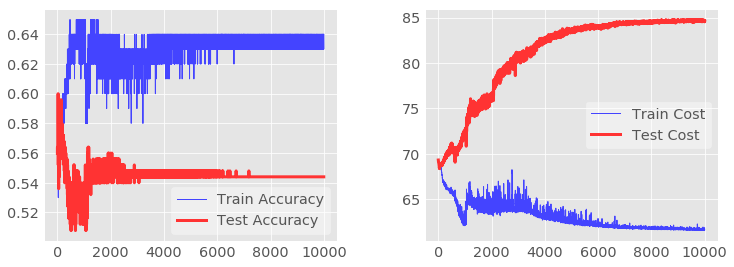

In [376]:
# version with 2 layers, learning rate and no lr decay 

import tensorflow as tf
tf.set_random_seed(0)
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

smarket = pd.read_csv('/home/yol/Documents/Dev/tensorflow/TensorFlow-Examples/notebooks/data/Smarket.csv', usecols=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 
       'Direction'])
down_up = pd.get_dummies(smarket.Direction)
smarket['Down'] = down_up.ix[:,0]
smarket['Up'] = down_up.ix[:,1]
smarket.head()

tr_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[:1000]
tr_labels = smarket[['Down', 'Up']].values[:1000]
tst_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[1000:]
tst_labels = smarket[['Down', 'Up']].values[1000:]
epochs = 10000  
batch_size = 100
# lr = 0.005
# variable learning rate
lr = tf.placeholder(tf.float32)
### L = 4
# 10000, 100, 0.01 = 0564
# 10000, 75, 0.01 = 0.588
# 10000, 25, 0.001 = 0.6
# 10000, 100, 0.001 = 0.572
# 10000, 75, 0.001 = 0.608/0.6
# 10000, 75, 0.005 = 0.604
# 10000, 75, 0.0025 = 0.596
# 10000, 75, 0.002 = 0.6
####  L = 8, 10000, 75, 0.001 = 0.608/0.6


# original with 4 layers with  relu nodes and then 1 softmax nodes: L = 4, M = 3, N = 2, O = 2
L = 4
M = 4
N = 4
O = 4

# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
X = tf.placeholder(tf.float32, [None, 5])
# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 2])
W1 = tf.Variable(tf.truncated_normal([5, L], stddev=0.1)) 
B1 = tf.Variable(tf.ones([L])/10)
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.ones([M])/10)
W3 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B3 = tf.Variable(tf.ones([N])/10)
W4 = tf.Variable(tf.truncated_normal([N, O], stddev=0.1))
B4 = tf.Variable(tf.ones([O])/10)
W5 = tf.Variable(tf.truncated_normal([O, 2], stddev=0.1))
B5 = tf.Variable(tf.ones([2]))


# The model
Y1 = tf.nn.relu(tf.matmul(tf.reshape(X, [-1, 5]), W1) + B1)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + B4)

Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*batch_size

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

a_tr_list = []
c_tr_list = []
a_test_list = []
c_test_list = []
for i in range(epochs):
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0 # 0.003-0.0001-2000=>0.9826 done in 5000 iterations
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)

    for batch in range(tr_data.shape[0]//batch_size):   


        
        # load batch of images and corresponding answers for training data
        batch_X, batch_Y = tr_data[batch*batch_size:batch*batch_size+batch_size+1],\
        tr_labels[batch*batch_size:batch*batch_size+batch_size+1]
        train_data={X: batch_X, Y_: batch_Y}

        # train
        sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, lr : learning_rate})
    print("***** Epoch: %i ****** Batch: %i **** cost test %s" % (i,batch, c_test))
    a_tr, c_tr = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    a_tr_list.append(a_tr)
    c_tr_list.append(c_tr)

    test_data={X: tst_data, Y_: tst_labels}
    a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    a_test_list.append(a_test)
    c_test_list.append(c_test)
print(max(a_test_list))


# plotting Accuacy and Cost
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(12,4))
ax1.plot(a_tr_list, label='Train Accuracy')
ax1.plot(a_test_list, label='Test Accuracy')
ax1.legend()

ax2.plot(c_tr_list, label='Train Cost')
ax2.plot(c_test_list, label='Test Cost')
ax2.legend()

### 4 Layers NN with dropout for MNIST

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
0: accuracy:0.1 loss: 230.056 (lr:0.003)
0: ********* epoch 1 ********* test accuracy:0.0804 test loss: 231.177
20: accuracy:0.37 loss: 172.92 (lr:0.0029711445178725875)
20: ********* epoch 1 ********* test accuracy:0.5275 test loss: 139.021
40: accuracy:0.55 loss: 115.46 (lr:0.0029425761525895904)
40: ********* epoch 1 ********* test accuracy:0.7454 test loss: 92.3636
60: accuracy:0.72 loss: 73.8674 (lr:0.0029142920472906737)
60: ********* epoch 1 ********* test accuracy:0.8001 test loss: 60.8158
80: accuracy:0.78 loss: 65.39 (lr:0.0028862893735417373)
80: ********* epoch 1 ********* test accuracy:0.8409 test loss: 50.9038
100: accuracy:0.82 loss: 65.8125 (lr:0.0028585653310520707)
100: ********* epoch 1 ********* test accuracy:0.866 test loss: 45.3699
120: accuracy:0.83 loss: 52.0731 (lr:0.0028311171473943213)
120: *

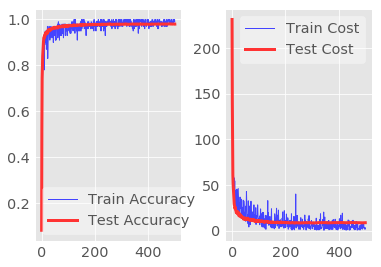

In [358]:
# encoding: UTF-8
# Copyright 2016 Google.com
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import tensorflow as tf
import math
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
tf.set_random_seed(0)

# neural network with 5 layers
#
# · · · · · · · · · ·          (input data, flattened pixels)       X [batch, 784]   # 784 = 28*28
# \x/x\x/x\x/x\x/x\x/ ✞     -- fully connected layer (relu+dropout) W1 [784, 200]      B1[200]
#  · · · · · · · · ·                                                Y1 [batch, 200]
#   \x/x\x/x\x/x\x/ ✞       -- fully connected layer (relu+dropout) W2 [200, 100]      B2[100]
#    · · · · · · ·                                                  Y2 [batch, 100]
#     \x/x\x/x\x/ ✞         -- fully connected layer (relu+dropout) W3 [100, 60]       B3[60]
#      · · · · ·                                                    Y3 [batch, 60]
#       \x/x\x/ ✞           -- fully connected layer (relu+dropout) W4 [60, 30]        B4[30]
#        · · ·                                                      Y4 [batch, 30]
#         \x/               -- fully connected layer (softmax)      W5 [30, 10]        B5[10]
#          ·                                                        Y5 [batch, 10]

# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])
# variable learning rate
lr = tf.placeholder(tf.float32)
# Probability of keeping a node during dropout = 1.0 at test time (no dropout) and 0.75 at training time
pkeep = tf.placeholder(tf.float32)

# five layers and their number of neurons (tha last layer has 10 softmax neurons)
L = 200
M = 100
N = 60
O = 30
# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1))  # 784 = 28 * 28
B1 = tf.Variable(tf.ones([L])/10)
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.ones([M])/10)
W3 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B3 = tf.Variable(tf.ones([N])/10)
W4 = tf.Variable(tf.truncated_normal([N, O], stddev=0.1))
B4 = tf.Variable(tf.ones([O])/10)
W5 = tf.Variable(tf.truncated_normal([O, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

# The model, with dropout at each layer
XX = tf.reshape(X, [-1, 784])

Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)

Y2 = tf.nn.relu(tf.matmul(Y1d, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)

Y3 = tf.nn.relu(tf.matmul(Y2d, W3) + B3)
Y3d = tf.nn.dropout(Y3, pkeep)

Y4 = tf.nn.relu(tf.matmul(Y3d, W4) + B4)
Y4d = tf.nn.dropout(Y4, pkeep)

Ylogits = tf.matmul(Y4d, W5) + B5
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# matplotlib visualisation
allweights = tf.concat([tf.reshape(W1, [-1]), tf.reshape(W2, [-1]), tf.reshape(W3, [-1]), tf.reshape(W4, [-1]), tf.reshape(W5, [-1])], 0)
allbiases  = tf.concat([tf.reshape(B1, [-1]), tf.reshape(B2, [-1]), tf.reshape(B3, [-1]), tf.reshape(B4, [-1]), tf.reshape(B5, [-1])], 0)

# training step, the learning rate is a placeholder
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
test_acc_list, test_cost_list, train_acc_list, train_cost_list = [],[],[],[]


# You can call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # learning rate decay
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0 # 0.003-0.0001-2000=>0.9826 done in 5000 iterations
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)

    # compute training values for visualisation
    if update_train_data:
        a, c, w, b = sess.run([accuracy, cross_entropy, allweights, allbiases], {X: batch_X, Y_: batch_Y, pkeep: 0.75})
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c) + " (lr:" + str(learning_rate) + ")")
        train_acc_list.append(a)
        train_cost_list.append(c)

    # compute test values for visualisation
    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], {X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))
        test_acc_list.append(a)
        test_cost_list.append(c)

    # the backpropagation training step
    sess.run(train_step, {X: batch_X, Y_: batch_Y, pkeep: 0.75, lr: learning_rate})

# datavis.animate(training_step, iterations=10000+1, train_data_update_freq=20, test_data_update_freq=100, more_tests_at_start=True)

# to save the animation as a movie, add save_movie=True as an argument to datavis.animate
# to disable the visualisation use the following line instead of the datavis.animate line
for i in range(10000+1): training_step(i, i % 20 == 0, i % 20 == 0)

print("max test accuracy: %s"% max(test_acc_list))

# plotting Accuacy and Cost

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.plot(train_acc_list, label='Train Accuracy')
ax1.plot(test_acc_list, label='Test Accuracy')
ax1.legend()
# ax1.xlabel('Iterations')
# ax1.ylabel('Accuracy')

ax2.plot(train_cost_list, label='Train Cost')
ax2.plot(test_cost_list, label='Test Cost')
ax2.legend()




# Some results to expect:
# (In all runs, if sigmoids are used, all biases are initialised at 0, if RELUs are used,
# all biases are initialised at 0.1 apart from the last one which is initialised at 0.)

## test with and without dropout, decaying learning rate from 0.003 to 0.0001 decay_speed 2000, 10K iterations
# final test accuracy = 0.9817 (relu, dropout 0.75, training cross-entropy still a bit noisy, test cross-entropy stable, test accuracy stable just under 98.2)
# final test accuracy = 0.9824 (relu, no dropout, training cross-entropy down to 0, test cross-entropy goes up significantly, test accuracy stable around 98.2)

## learning rate = 0.003, 10K iterations, no dropout
# final test accuracy = 0.9788 (sigmoid - slow start, training cross-entropy not stabilised in the end)
# final test accuracy = 0.9825 (relu - above 0.97 in the first 1500 iterations but noisy curves)

## now with learning rate = 0.0001, 10K iterations, no dropout
# final test accuracy = 0.9722 (relu - slow but smooth curve, would have gone higher in 20K iterations)

## decaying learning rate from 0.003 to 0.0001 decay_speed 2000, 10K iterations, no dropout
# final test accuracy = 0.9746 (sigmoid - training cross-entropy not stabilised)
# final test accuracy = 0.9824 (relu, training cross-entropy down to 0, test cross-entropy goes up significantly, test accuracy stable around 98.2)
# on another run, peak at 0.9836


### 4 Layers NN for smarket with Dropout

***** Epoch: 0 ****** Batch: 12 **** cost test 55.0839
***** Epoch: 1 ****** Batch: 12 **** cost test 51.3822
***** Epoch: 2 ****** Batch: 12 **** cost test 52.0299
***** Epoch: 3 ****** Batch: 12 **** cost test 52.0465
***** Epoch: 4 ****** Batch: 12 **** cost test 51.9286
***** Epoch: 5 ****** Batch: 12 **** cost test 51.8122
***** Epoch: 6 ****** Batch: 12 **** cost test 51.7991
***** Epoch: 7 ****** Batch: 12 **** cost test 51.8627
***** Epoch: 8 ****** Batch: 12 **** cost test 51.8955
***** Epoch: 9 ****** Batch: 12 **** cost test 51.5557
***** Epoch: 10 ****** Batch: 12 **** cost test 51.2344
***** Epoch: 11 ****** Batch: 12 **** cost test 51.6578
***** Epoch: 12 ****** Batch: 12 **** cost test 51.3893
***** Epoch: 13 ****** Batch: 12 **** cost test 51.688
***** Epoch: 14 ****** Batch: 12 **** cost test 51.6502
***** Epoch: 15 ****** Batch: 12 **** cost test 51.5693
***** Epoch: 16 ****** Batch: 12 **** cost test 51.2758
***** Epoch: 17 ****** Batch: 12 **** cost test 51.7594
***

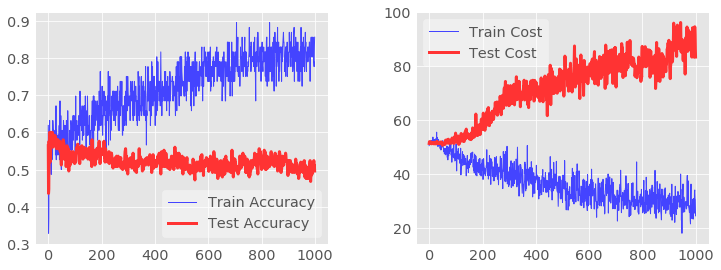

In [381]:
# version with 2 layers, learning rate and no lr decay 

import tensorflow as tf
tf.set_random_seed(0)
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

smarket = pd.read_csv('/home/yol/Documents/Dev/tensorflow/TensorFlow-Examples/notebooks/data/Smarket.csv', usecols=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 
       'Direction'])
down_up = pd.get_dummies(smarket.Direction)
smarket['Down'] = down_up.ix[:,0]
smarket['Up'] = down_up.ix[:,1]
smarket.head()

tr_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[:1000]
tr_labels = smarket[['Down', 'Up']].values[:1000]
tst_data = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values[1000:]
tst_labels = smarket[['Down', 'Up']].values[1000:]
epochs = 1000  
batch_size = 75
# lr = 0.005
# variable learning rate
lr = tf.placeholder(tf.float32)
# placeholder for dropout parameter 
pkeep = tf.placeholder(tf.float32)


# original with 4 layers with  relu nodes and then 1 softmax nodes: L = 4, M = 3, N = 2, O = 2
L = 100
M = 80
N = 60
O = 40

# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
X = tf.placeholder(tf.float32, [None, 5])
# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 2])
W1 = tf.Variable(tf.truncated_normal([5, L], stddev=0.1)) 
B1 = tf.Variable(tf.ones([L])/10)
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.ones([M])/10)
W3 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B3 = tf.Variable(tf.ones([N])/10)
W4 = tf.Variable(tf.truncated_normal([N, O], stddev=0.1))
B4 = tf.Variable(tf.ones([O])/10)
W5 = tf.Variable(tf.truncated_normal([O, 2], stddev=0.1))
B5 = tf.Variable(tf.ones([2]))


# The model, with dropout at each layer
XX = tf.reshape(X, [-1, 5])

Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)

Y2 = tf.nn.relu(tf.matmul(Y1d, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)

Y3 = tf.nn.relu(tf.matmul(Y2d, W3) + B3)
Y3d = tf.nn.dropout(Y3, pkeep)

Y4 = tf.nn.relu(tf.matmul(Y3d, W4) + B4)
Y4d = tf.nn.dropout(Y4, pkeep)

Ylogits = tf.matmul(Y4d, W5) + B5
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*batch_size

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

a_tr_list = []
c_tr_list = []
a_test_list = []
c_test_list = []
for i in range(epochs):
    max_learning_rate = 0.005
    min_learning_rate = 0.0001
    decay_speed = 2000.0 # 0.003-0.0001-2000=>0.9826 done in 5000 iterations
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)
    for batch in range(tr_data.shape[0]//batch_size):   
        

        
        # load batch of images and corresponding answers for training data
        batch_X, batch_Y = tr_data[batch*batch_size:batch*batch_size+batch_size+1],\
        tr_labels[batch*batch_size:batch*batch_size+batch_size+1]
        train_data={X: batch_X, Y_: batch_Y}

        # train
        sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, lr : learning_rate, pkeep: 0.75})
    print("***** Epoch: %i ****** Batch: %i **** cost test %s" % (i,batch, c_test))
    a_tr, c_tr = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y, pkeep: 0.75})
    a_tr_list.append(a_tr)
    c_tr_list.append(c_tr)

    test_data={X: tst_data, Y_: tst_labels}
    a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict={X: tst_data, Y_: tst_labels, pkeep: 1.0})
    a_test_list.append(a_test)
    c_test_list.append(c_test)
print(max(a_test_list))


# plotting Accuacy and Cost
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(12,4))
ax1.plot(a_tr_list, label='Train Accuracy')
ax1.plot(a_test_list, label='Test Accuracy')
ax1.legend()

ax2.plot(c_tr_list, label='Train Cost')
ax2.plot(c_test_list, label='Test Cost')
ax2.legend()

### 4 Layers CNN for MNIST

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
0: accuracy:0.15 loss: 238.619 (lr:0.003)
0: ********* epoch 1 ********* test accuracy:0.098 test loss: 248.1
20: accuracy:0.75 loss: 88.2691 (lr:0.0029711445178725875)
20: ********* epoch 1 ********* test accuracy:0.818 test loss: 60.4648
40: accuracy:0.89 loss: 46.5974 (lr:0.0029425761525895904)
40: ********* epoch 1 ********* test accuracy:0.8923 test loss: 35.7271
60: accuracy:0.95 loss: 16.3808 (lr:0.0029142920472906737)
60: ********* epoch 1 ********* test accuracy:0.9228 test loss: 26.0713
80: accuracy:0.95 loss: 24.9375 (lr:0.0028862893735417373)
80: ********* epoch 1 ********* test accuracy:0.93 test loss: 23.0701
100: accuracy:0.89 loss: 30.2997 (lr:0.0028585653310520707)
100: ********* epoch 1 ********* test accuracy:0.9396 test loss: 20.7141
120: accuracy:0.94 loss: 25.8291 (lr:0.0028311171473943213)
120: *

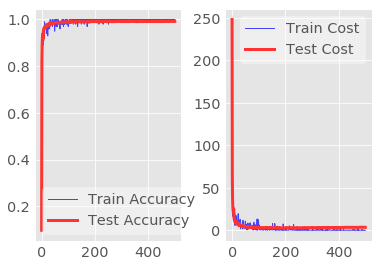

In [424]:
# encoding: UTF-8
# Copyright 2016 Google.com
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import tensorflow as tf
import math
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
tf.set_random_seed(0)

# neural network with 5 layers
#
# · · · · · · · · · ·          (input data, flattened pixels)       X [batch, 784]   # 784 = 28*28
# \x/x\x/x\x/x\x/x\x/ ✞     -- fully connected layer (relu+dropout) W1 [784, 200]      B1[200]
#  · · · · · · · · ·                                                Y1 [batch, 200]
#   \x/x\x/x\x/x\x/ ✞       -- fully connected layer (relu+dropout) W2 [200, 100]      B2[100]
#    · · · · · · ·                                                  Y2 [batch, 100]
#     \x/x\x/x\x/ ✞         -- fully connected layer (relu+dropout) W3 [100, 60]       B3[60]
#      · · · · ·                                                    Y3 [batch, 60]
#       \x/x\x/ ✞           -- fully connected layer (relu+dropout) W4 [60, 30]        B4[30]
#        · · ·                                                      Y4 [batch, 30]
#         \x/               -- fully connected layer (softmax)      W5 [30, 10]        B5[10]
#          ·                                                        Y5 [batch, 10]

# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])
# variable learning rate
lr = tf.placeholder(tf.float32)

# W = tf.Variable(tf.truncated_normal([5, 5, 3, 2], stddev=0.1)) 5x5 pixels, 3 input channels, 4 output channels
# B = tf.Variable(tf.ones([2])/10) # 2 is the number of output channels
pkeep = tf.placeholder(tf.float32)


# five layers and their number of neurons (tha last layer has 10 softmax neurons)
L = 6
M = 12
N = 24
O = 200
# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
W1 = tf.Variable(tf.truncated_normal([6, 6, 1, L], stddev=0.1)) 
B1 = tf.Variable(tf.ones([L])/10)
W2 = tf.Variable(tf.truncated_normal([5, 5, L, M], stddev=0.1)) 
B2 = tf.Variable(tf.ones([M])/10)
W3 = tf.Variable(tf.truncated_normal([4, 4, M, N], stddev=0.1))
B3 = tf.Variable(tf.ones([N])/10)
W4 = tf.Variable(tf.truncated_normal([7*7*N, O], stddev=0.1))  # fully connected layer
B4 = tf.Variable(tf.ones([O])/10)
W5 = tf.Variable(tf.truncated_normal([O, 10], stddev=0.1)) # for softmax
B5 = tf.Variable(tf.ones([10])/10)


# Ycnv = tf.nn.conv2d(X, W, strides=[1, stride, stride, 1], padding='SAME')
# Y = tf.nn.relu(Ycnv + B)


# The model

stride = 1  # output is 28x28
Ycnv1 = tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME')
Y1 = tf.nn.relu(Ycnv1 + B1)
#XX = tf.reshape(X, [-1, 784])

stride = 2  # output is 14x14
Ycnv2 = tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME')
Y2 = tf.nn.relu(Ycnv2 + B2)

stride = 2 # output is 7x7
Ycnv3 = tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME')
Y3 = tf.nn.relu(Ycnv3 + B3)

# reshape the output from the third convolution for the fully connected layer

YY = tf.reshape(Y3, shape=[-1, 7*7*N])
Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
Y4d = tf.nn.dropout(Y4, pkeep)

Ylogits = tf.matmul(Y4d, W5) + B5
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# matplotlib visualisation
allweights = tf.concat([tf.reshape(W1, [-1]), tf.reshape(W2, [-1]), tf.reshape(W3, [-1]), tf.reshape(W4, [-1]), tf.reshape(W5, [-1])], 0)
allbiases  = tf.concat([tf.reshape(B1, [-1]), tf.reshape(B2, [-1]), tf.reshape(B3, [-1]), tf.reshape(B4, [-1]), tf.reshape(B5, [-1])], 0)

# training step, the learning rate is a placeholder
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
test_acc_list, test_cost_list, train_acc_list, train_cost_list = [],[],[],[]


# You can call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # learning rate decay
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0 # 0.003-0.0001-2000=>0.9826 done in 5000 iterations
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)

    # compute training values for visualisation
    if update_train_data:
        a, c, w, b = sess.run([accuracy, cross_entropy, allweights, allbiases], {X: batch_X, Y_: batch_Y, pkeep: 0.75})
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c) + " (lr:" + str(learning_rate) + ")")
        train_acc_list.append(a)
        train_cost_list.append(c)

    # compute test values for visualisation
    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], {X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))
        test_acc_list.append(a)
        test_cost_list.append(c)

    # the backpropagation training step
    sess.run(train_step, {X: batch_X, Y_: batch_Y, lr: learning_rate, pkeep: 0.75})

# datavis.animate(training_step, iterations=10000+1, train_data_update_freq=20, test_data_update_freq=100, more_tests_at_start=True)

# to save the animation as a movie, add save_movie=True as an argument to datavis.animate
# to disable the visualisation use the following line instead of the datavis.animate line
for i in range(10000+1): training_step(i, i % 20 == 0, i % 20 == 0)

print("max test accuracy: %s"% max(test_acc_list))

# plotting Accuacy and Cost

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.plot(train_acc_list, label='Train Accuracy')
ax1.plot(test_acc_list, label='Test Accuracy')
ax1.legend()
# ax1.xlabel('Iterations')
# ax1.ylabel('Accuracy')

ax2.plot(train_cost_list, label='Train Cost')
ax2.plot(test_cost_list, label='Test Cost')
ax2.legend()


# max test accuracy: 0.9911
# max test accuracy: 0.9911 with 5x5, 4x4, 4x4, dropout
# max test accuracy: 0.9924 with 6x6, 5x5, 4x4, dropout

# Some results to expect:
## All runs 10K iterations:
# layers 4 8 12 200, patches 5x5str1 5x5str2 4x4str2 best 0.989
# layers 4 8 12 200, patches 5x5str1 4x4str2 4x4str2 best 0.9892
# layers 6 12 24 200, patches 5x5str1 4x4str2 4x4str2 best 0.9908 after 10000 iterations but going downhill from 5000 on
# layers 6 12 24 200, patches 5x5str1 4x4str2 4x4str2 dropout=0.75 best 0.9922  (but above 0.99 after 1400 iterations only)
# layers 4 8 12 200, patches 5x5str1 4x4str2 4x4str2 dropout=0.75, best 0.9914 at 13700 iterations
# layers 9 16 25 200, patches 5x5str1 4x4str2 4x4str2 dropout=0.75, best 0.9918 at 10500 (but 0.99 at 1500 iterations already, 0.9915 at 5800)
# layers 9 16 25 300, patches 5x5str1 4x4str2 4x4str2 dropout=0.75, best 0.9916 at 5500 iterations (but 0.9903 at 1200 iterations already)
# attempts with 2 fully-connected layers: no better 300 and 100 neurons, dropout 0.75 and 0.5, 6x6 5x5 4x4 patches no better
# layers 6 12 24 200, patches 6x6str1 5x5str2 4x4str2 no dropout best 0.9906 after 3100 iterations (avove 0.99 from iteration 1400)
#*layers 6 12 24 200, patches 6x6str1 5x5str2 4x4str2 dropout=0.75 best 0.9928 after 12800 iterations (but consistently above 0.99 after 1300 iterations only, 0.9916 at 2300 iterations, 0.9921 at 5600, 0.9925 at 20000)
#*same with dacaying learning rate 0.003-0.0001-2000: best 0.9931 (on other runs max accuracy 0.9921, 0.9927, 0.9935, 0.9929, 0.9933)



{'time': '2015-08-30T07:56:28.000Z', 'usd': 1.17}

SyntaxError: invalid syntax (<ipython-input-422-dcb6d612a816>, line 2)